# Descriptive and Inferential Statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams["figure.figsize"] = [10, 7.5]

## Descriptive Statistics
### Dataset

In [3]:
data = pd.read_csv("shampoo.csv")
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


### Summary

In [4]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [5]:
data.mean(numeric_only=True)

Sales    312.6
dtype: float64

In [6]:
data.std(numeric_only=True)

Sales    148.937164
dtype: float64

### Visualizations
#### Histograms

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

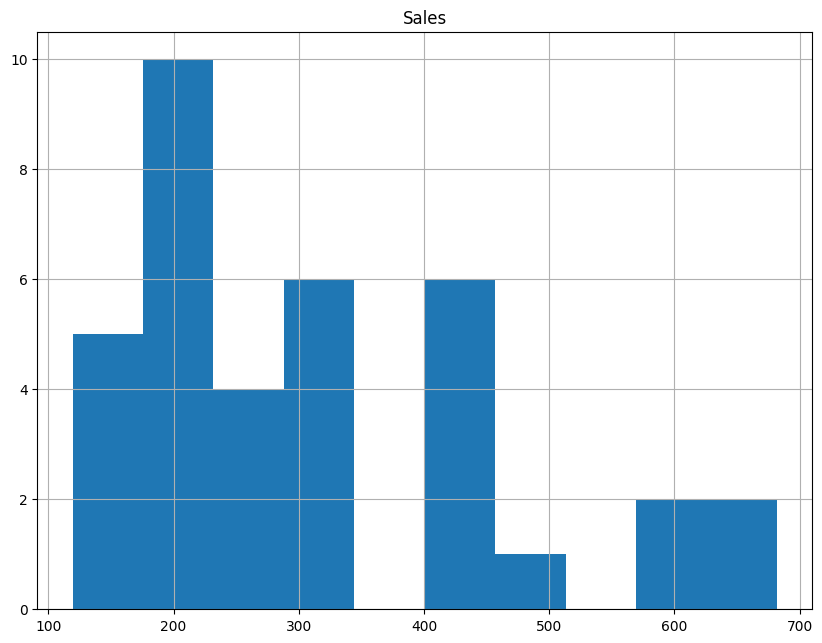

In [7]:
data.hist()

Text(0, 0.5, 'Frequency')

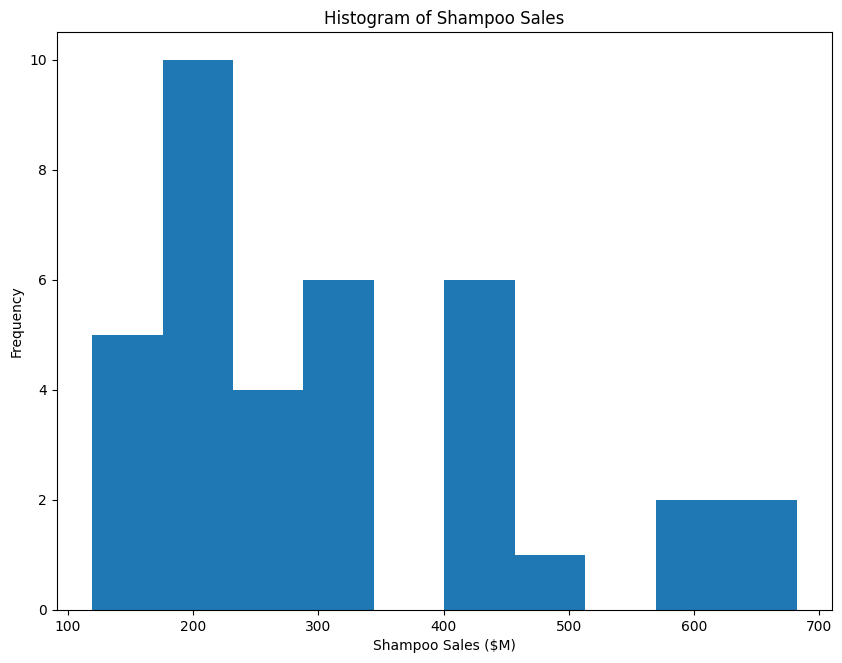

In [8]:
plt.hist(data["Sales"])
plt.title("Histogram of Shampoo Sales")
plt.xlabel("Shampoo Sales ($M)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

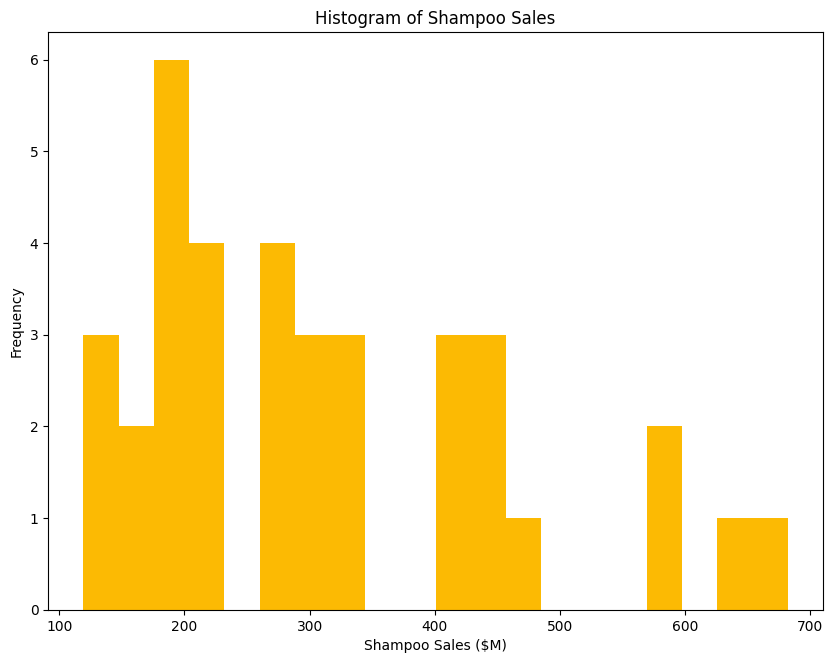

In [9]:
plt.hist(data["Sales"], bins=20, color="#fcba03")
plt.title("Histogram of Shampoo Sales")
plt.xlabel("Shampoo Sales ($M)")
plt.ylabel("Frequency")

/tmp/ipykernel_40437/2618600143.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


Text(0, 0.5, 'Density')

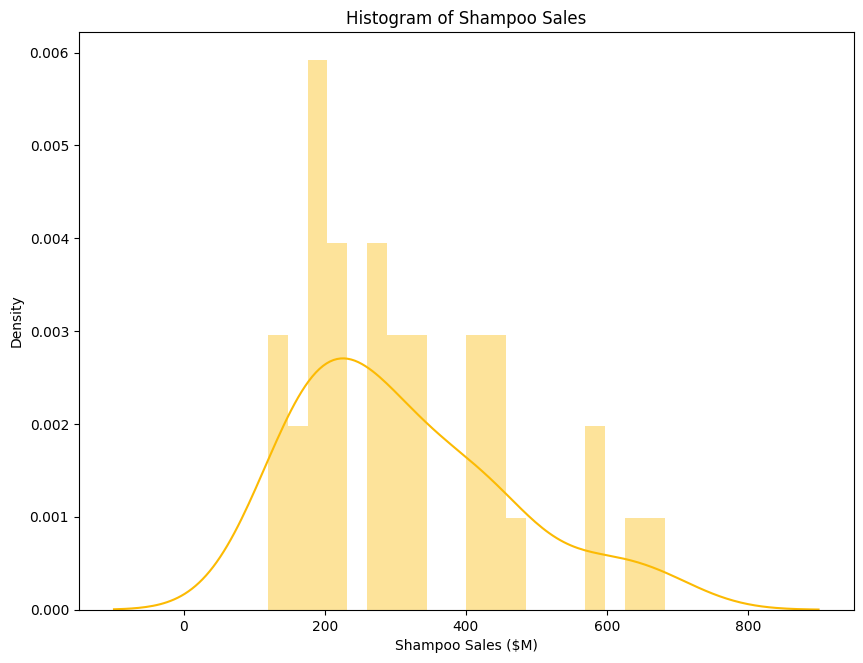

In [10]:
# DEPRECATED FUNCTION
sns.distplot(
    data["Sales"],
    bins=20,
    hist=True,
    kde=True,
    color="#fcba03",
)
plt.title("Histogram of Shampoo Sales")
plt.xlabel("Shampoo Sales ($M)")
plt.ylabel("Density")

#### Scatter plots

Text(0, 0.5, 'Sales of Shampoo ($M)')

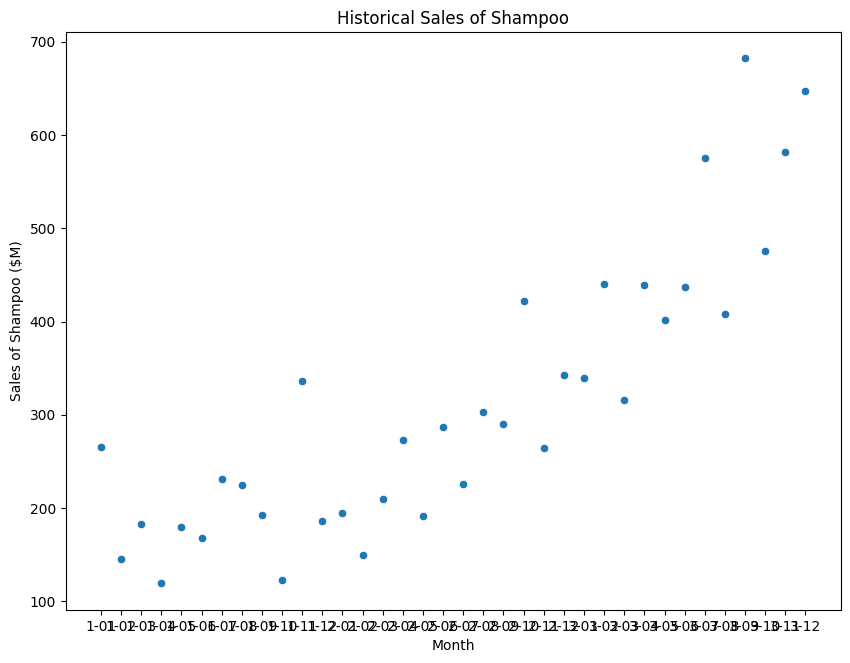

In [11]:
sns.scatterplot(x=data["Month"], y=data["Sales"])
plt.title("Historical Sales of Shampoo")
plt.xlabel("Month")
plt.ylabel("Sales of Shampoo ($M)")

## Inferential Statistics

In [12]:
co2_data = pd.read_csv("co2_dataset.csv")
co2_data.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


Text(0, 0.5, 'CO2 Concentration (ppm)')

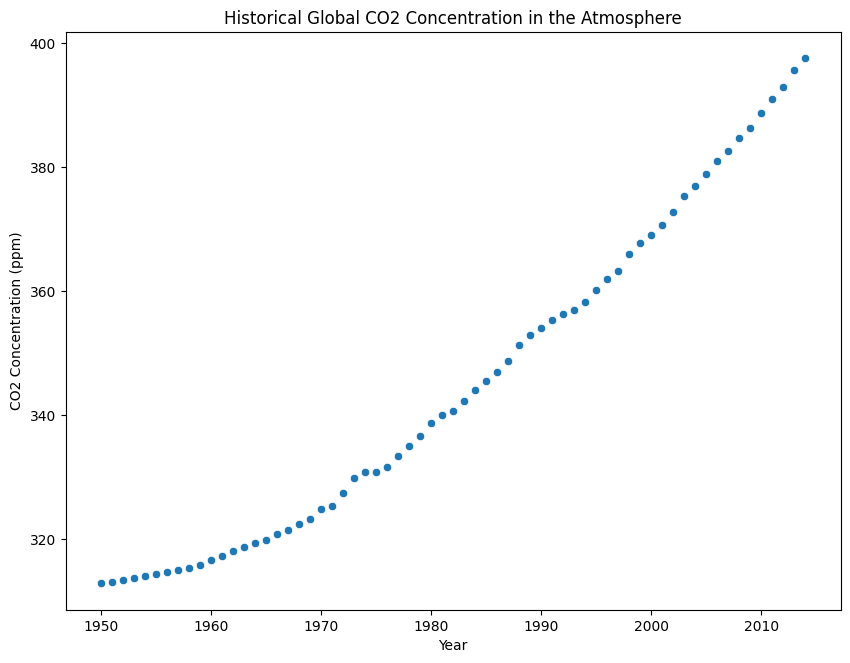

In [13]:
X = co2_data["year"].values[1950:]
y = co2_data["data_mean_global"].values[1950:]

sns.scatterplot(x=X, y=y)
plt.title("Historical Global CO2 Concentration in the Atmosphere")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")

In [14]:
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

reg = LinearRegression()
reg = reg.fit(X, y)
print(
    f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}"
)

The slope is 1.3588711929434647 and the intercept is -2348.0338300545372


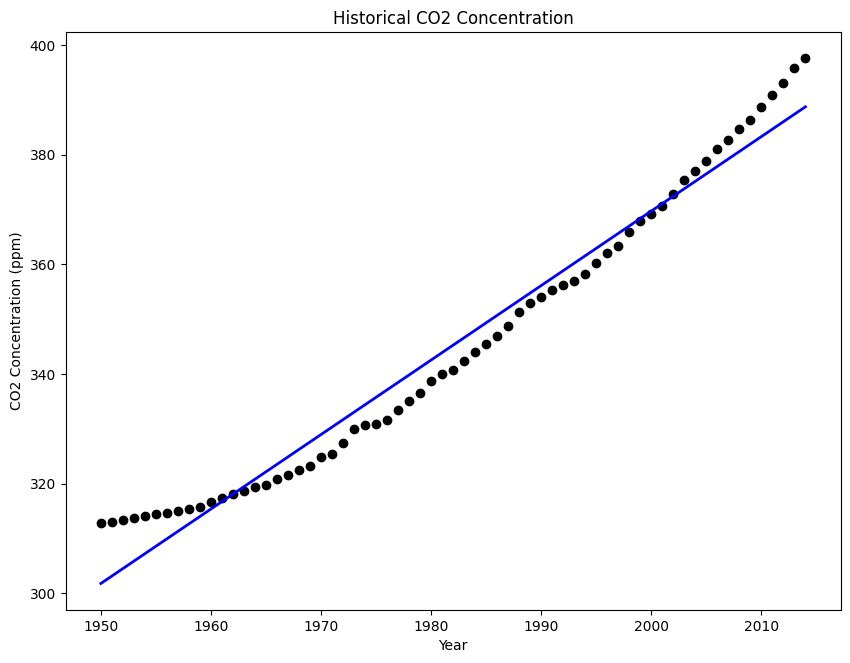

In [15]:
X = co2_data["year"].values[1950:]
y = co2_data["data_mean_global"].values[1950:]

predictions = reg.predict(X.reshape((-1, 1)))

plt.scatter(X, y, c="black")
plt.plot(X, predictions, c="blue", linewidth=2)
plt.title("Historical CO2 Concentration")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.show()

In [16]:
X = sm.add_constant(co2_data["year"].values[1950:])
model = sm.OLS(co2_data["data_mean_global"].values[1950:], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           6.40e-50
Time:                        19:34:47   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.000   -2466.259   -2229.809
x1             1.3589      0.030     45.526      0.000       1.299       1.419
==============================================================================
Omnibus:                        7.614   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.820
Skew:                           0.812   Prob(JB):                       0.0200
Kurtosis:                       2.497   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

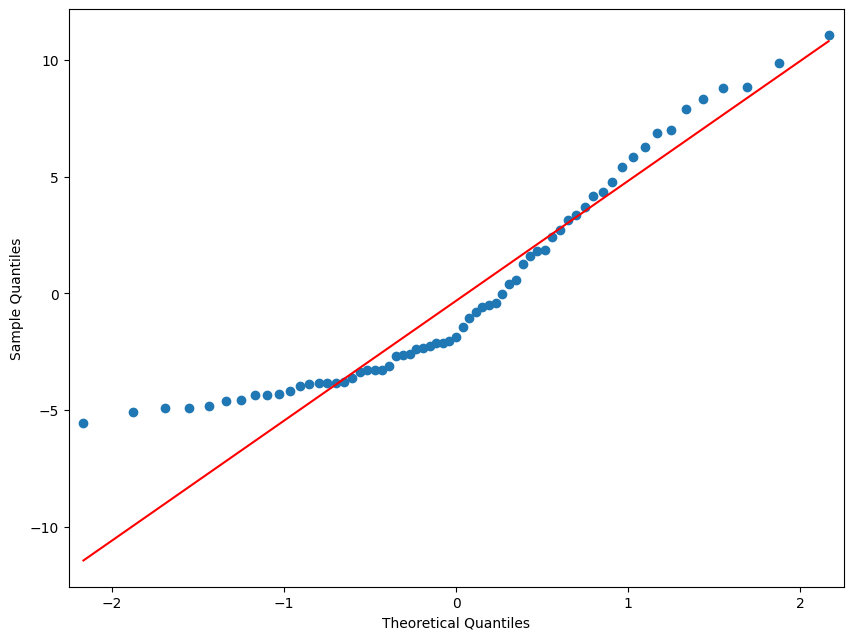

In [17]:
residuals = model.resid
qq_plot = sm.qqplot(residuals, line="q")
plt.show()

(array([12., 17.,  8.,  5.,  6.,  5.,  3.,  3.,  4.,  2.]),
 array([-5.55069622, -3.89002908, -2.22936195, -0.56869481,  1.09197233,
         2.75263947,  4.4133066 ,  6.07397374,  7.73464088,  9.39530802,
        11.05597516]),
 <BarContainer object of 10 artists>)

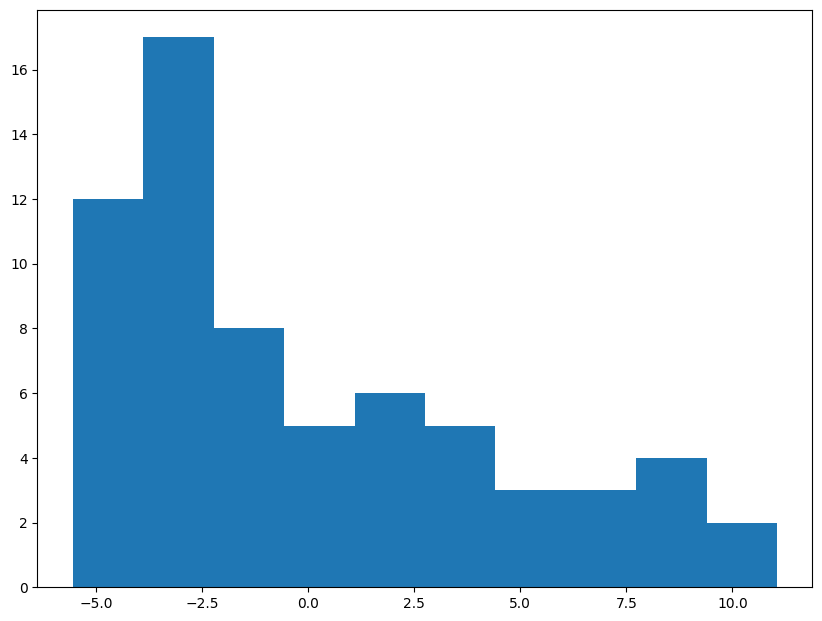

In [18]:
plt.hist(residuals)